## 데이터 가져오기

In [434]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

## 모델에 입력할 데이터 X data, y data 준비

In [435]:
x_data=diabetes.data
y_data=diabetes.target

In [436]:
print(x_data.shape)
print(y_data.shape)

(442, 10)
(442,)


In [437]:
print(diabetes.feature_names) #당뇨병 features
print(diabetes.target[:10]) #당뇨병 진행 정도

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


## train 데이터와 test 데이터로 분리

In [438]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=32)

In [439]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델준비하기

In [440]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [441]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 손실함수 loss 정의하기

In [442]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    L= MSE(predictions,y)
    return L

## 기울기를 구하는 gradient 함수 구현하기

In [443]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 하이퍼 파라미터인 학습률 설정하기

In [444]:
LEARNING_RATE = 0.1

## 모델 학습하기

In [445]:
losses = []

for i in range(1, 10000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 500 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 500 : Loss 4021.7841
Iteration 1000 : Loss 3456.7935
Iteration 1500 : Loss 3230.9799
Iteration 2000 : Loss 3112.6505
Iteration 2500 : Loss 3042.9575
Iteration 3000 : Loss 2999.9874
Iteration 3500 : Loss 2972.8855
Iteration 4000 : Loss 2955.5171
Iteration 4500 : Loss 2944.2289
Iteration 5000 : Loss 2936.7912
Iteration 5500 : Loss 2931.8216
Iteration 6000 : Loss 2928.4522
Iteration 6500 : Loss 2926.1316
Iteration 7000 : Loss 2924.5061
Iteration 7500 : Loss 2923.3461
Iteration 8000 : Loss 2922.5013
Iteration 8500 : Loss 2921.8723
Iteration 9000 : Loss 2921.3927
Iteration 9500 : Loss 2921.0176


## test 데이터에 대한 성능 확인하기

In [446]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2798.661835729524

## 정답 데이터와 예측한 데이터 시각화하기

In [447]:
import matplotlib.pyplot as plt

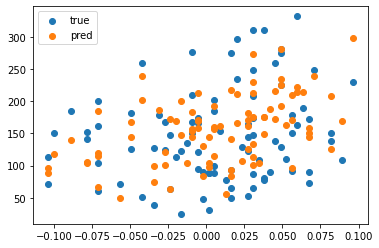

In [448]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()